In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.size'] = 18
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.linewidth'] = 2

In [35]:
def get_figure():
    '''
    Initialize plot and style
    Returns: fig, ax from plt.subplots()
    '''
    fig, ax = plt.subplots()

    ax.xaxis.set_tick_params(which='major', size=7, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=7, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

    ax.tick_params(bottom=True, top=True, left=True, right=True)
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    ax.tick_params(direction='in')

    return fig, ax 

In [36]:
def penalty_sigmoid(x,w=10):
  '''
  Takes input x and calculates penalty sigmoid term for response function being optimized.
  Inputs: x - value to evaluate sigmoid function at
          w - weight of the sigmoid function (slope at x = 0.5)
  Returns: penalty sigmoid value 
  '''
  return 1/(1 + np.exp(-w*(x-0.5))) - 0.5

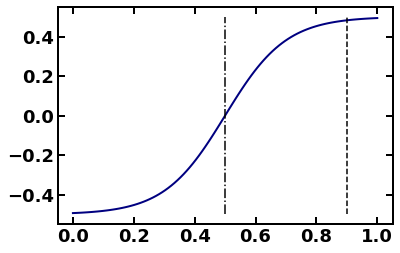

In [37]:
###Plot the penalty sigmoid function
fig, ax = get_figure()

ax.plot(np.linspace(0,1,num=100),[penalty_sigmoid(x) for x in np.linspace(0,1,num=100)],c='navy',linewidth=2)
ax.plot(np.linspace(0.9,0.9,num=20),np.linspace(-0.5,0.5,num=20),'--',c='black')
ax.plot(np.linspace(0.5,0.5,num=20),np.linspace(-0.5,0.5,num=20),'-.',c='black')
plt.show()

In [38]:
def response_fn(y,p,w,alpha):
  '''
  Response function to optimize by Holmes planner
  Inputs: y - response value (production rate)
          p - variable to be penalized between 0 and 0.5 (yield)
          w - weight of the penalty (slope of sigmoid at p = 0.5), default is w=10
          alpha - size of penalty between -0.5*alpha and 0.5*alpha 
  '''

  return y + penalty_sigmoid(p,w)*alpha

90 percent of reward is at a yield of 80.00


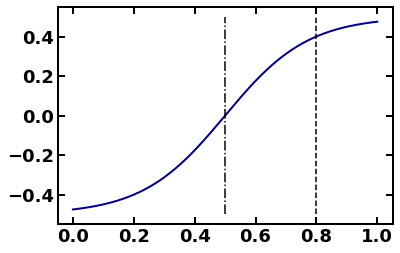

In [39]:
###Plot the penalty sigmoid function with specific alpha

alpha = 1
#Luke updated from 10 to 5 or 1

fig, ax = get_figure()

yield_values = np.linspace(0,1,num=10000)
responses = np.array([response_fn(y=0.0,p=x,w=7.325,alpha=alpha) for x in np.linspace(0,1,num=10000)])
saturated_yield = np.argwhere(responses>=0.4)[0]
print(r'90 percent of reward is at a yield of %.2f'%(yield_values[saturated_yield][0]*100))

ax.plot(yield_values,responses,c='navy',linewidth=2)
ax.plot(np.linspace(0.8,0.8,num=20),np.linspace(-alpha*0.5,0.5*alpha,num=20),'--',c='black')
ax.plot(np.linspace(0.5,0.5,num=20),np.linspace(-0.5*alpha,0.5*alpha,num=20),'-.',c='black')
plt.show()

90 percent of reward is at a yield of 80.00


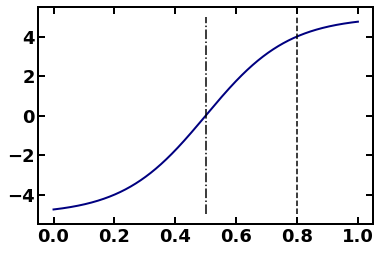

In [40]:
#comparions for alpha if needed"
alpha = 10

fig, ax = get_figure()

yield_values = np.linspace(0,1,num=10000)
responses = np.array([response_fn(y=0.0,p=x,w=7.325,alpha=alpha) for x in np.linspace(0,1,num=10000)])
saturated_yield = np.argwhere(responses>=4.0)[0]
print(r'90 percent of reward is at a yield of %.2f'%(yield_values[saturated_yield][0]*100))

ax.plot(yield_values,responses,c='navy',linewidth=2)
ax.plot(np.linspace(0.8,0.8,num=20),np.linspace(-alpha*0.5,0.5*alpha,num=20),'--',c='black')
ax.plot(np.linspace(0.5,0.5,num=20),np.linspace(-0.5*alpha,0.5*alpha,num=20),'-.',c='black')
plt.show()

In [41]:

y_values = [0.204, 0.140, 1.163, 0.921, 0.559, 0.541, 0.052, 0.669, 0.677, 1.147, 0.989, 0.749, 1.736, 1.075]
yields = [0.034, 0.051, 0.683, 0.835, 0.493, 0.533, 0.075, 0.977, 0.940, 1.09, 0.962, 0.910, 0.649, 0.853]
# yields in decimal format (ie. 100% = 1.0)

alpha = 1
w = 7.325

for j, k in enumerate(y_values):
  augmented_y_values = response_fn(y=k,p=yields[j],w=w,alpha=alpha)
  print(augmented_y_values)

-0.2641222470262464
-0.32404691270119773
1.4555680441640961
1.3418443606668182
0.5461840577704797
0.6011387045116903
-0.4054309035303167
1.1395172834708829
1.1386906928253615
1.6338973301875015
1.4562054946902583
1.2017207351962533
1.9846499634106376
1.5049371951609363


In [42]:
df = pd.read_csv('data.csv')
df.head()

,Reagent1,Stoichiometry Value of Pyridine,temp,yield,time,production,response,round
0,C1CCMCC1,54,44,3.4,5,0.204,-2.1366,0
1,C1CCMCC2,50,70,5.1,12,0.140,-2.1802,0
2,C1CCMCC3,42,138,68.3,16,1.163,2.6259,0
3,C1CCMCC4,48,139,83.5,30,0.921,3.0252,1
4,C1CCMCC5,38,148,49.3,22,0.559,0.4949,1


In [43]:
df_output = df[['production','yield']]
df_output.head()

,production,yield
0,0.204,3.4
1,0.140,5.1
2,1.163,68.3
3,0.921,83.5
4,0.559,49.3


In [58]:
alpha = 1
w = 7.325

for j, k in enumerate(df['production']):
  augmented_values = response_fn(y=k,p=(df['yield']/100)[j],w=w,alpha=alpha)
  print('{} - Production (g/hr) = {:.2f} | Yield (%) = {:.1f} | Response = {:.2f}'.format([j], df['production'][j],df['yield'][j],augmented_values))

[0] - Production (g/hr) = 0.20 | Yield (%) = 3.4 | Response = -0.26
[1] - Production (g/hr) = 0.14 | Yield (%) = 5.1 | Response = -0.32
[2] - Production (g/hr) = 1.16 | Yield (%) = 68.3 | Response = 1.46
[3] - Production (g/hr) = 0.92 | Yield (%) = 83.5 | Response = 1.34
[4] - Production (g/hr) = 0.56 | Yield (%) = 49.3 | Response = 0.55
[5] - Production (g/hr) = 0.54 | Yield (%) = 53.3 | Response = 0.60
[6] - Production (g/hr) = 0.05 | Yield (%) = 7.5 | Response = -0.41
[7] - Production (g/hr) = 0.67 | Yield (%) = 97.7 | Response = 1.14
[8] - Production (g/hr) = 0.68 | Yield (%) = 94.0 | Response = 1.14
[9] - Production (g/hr) = 1.15 | Yield (%) = 108.6 | Response = 1.63
[10] - Production (g/hr) = 0.99 | Yield (%) = 96.2 | Response = 1.46
[11] - Production (g/hr) = 0.75 | Yield (%) = 91.0 | Response = 1.20
[12] - Production (g/hr) = 1.74 | Yield (%) = 64.9 | Response = 1.98
[13] - Production (g/hr) = 1.07 | Yield (%) = 85.3 | Response = 1.50


In [45]:
y_values = [1, 1, 1 ]
yields = [0.25, 0.50, 0.75]
# yields in decimal format (ie. 100% = 1.0)

alpha = 5
w = 7.325

for j, k in enumerate(y_values):
  augmented_y_values = response_fn(y=k,p=yields[j],w=w,alpha=alpha)
  print(augmented_y_values)

-0.8095528503357228
1.0
2.809552850335723
